# Clase 5

### Introducción a Transformers

Los transformers son una arquitectura de redes neuronales desarrollada por Google que ha revolucionado el campo del aprendizaje automático. Presentados en el artículo **"Attention is All You Need"** (2017), los transformadores son ampliamente utilizados en tareas que involucran datos secuenciales como texto, imágenes y audio.

### Características:


1. **mecanismo de atención:**
   - El corazón de los transformers es el **mecanismo de atención**, que permite al modelo enfocar su "atención" en las partes más importantes de la entrada. por ejemplo, en una frase, puede determinar qué palabras son más relevantes para comprender el significado general. este enfoque es independiente de la posición en la secuencia, lo que le permite capturar relaciones complejas entre elementos, sin importar cuán lejos estén.

2. **procesamiento paralelo:**
   - A diferencia de las redes neuronales recurrentes (rnn), que procesan una palabra o elemento a la vez, los transformers analizan toda la secuencia simultáneamente. esto no solo acelera el proceso de entrenamiento, sino que también mejora la eficiencia al aprovechar mejor las capacidades de hardware modernas, como las gpus.

3. **versatilidad:**
   - aunque inicialmente se diseñaron para tareas de texto, como traducción automática o generación de texto, los transformers han demostrado ser altamente flexibles. ahora se aplican en visión por computadora (ej., **vision transformers [vit]**), reconocimiento de voz, y en tareas multimodales, donde combinan texto e imágenes, como en sistemas de preguntas y respuestas visuales.

## Librería Transformers de Hugging Face

**Hugging Face** ha desarrollado la librería **Transformers**, que facilita el uso de esta arquitectura en diferentes tareas. Proporciona una API intuitiva que permite a los usuarios acceder a modelos preentrenados y personalizarlos según sus necesidades.

https://huggingface.co/


### Beneficios Clave:

- **Acceso a modelos preentrenados:** Permite usar modelos listos para tareas como clasificación, generación de texto o procesamiento de imágenes.
- **Compatibilidad multimodal:** Soporta tareas que combinan diferentes tipos de datos, como texto e imágenes.
- **Transferencia de aprendizaje:** Facilita el ajuste fino de modelos para tareas específicas con pocos datos adicionales.


# 1) Explorar transformers

In [ ]:
# trasnformes
!pip install transformers huggingface-hub
!pip install datasets
!pip install --upgrade datasets
!pip install --upgrade transformers

# librerias extras
!pip install pillow matplotlib requests
!pip install cryptography torch

# evitar warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="transformers.generation.utils")
warnings.filterwarnings("ignore", category=FutureWarning, module="transformers")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 94.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 31.1 MB/s eta 0:00:00
  A

*huggingface_hub es una biblioteca que permite interactuar con la plataforma de Hugging Face. Proporciona herramientas para buscar, cargar y compartir modelos, datasets y espacios de forma sencilla.*

In [ ]:
#@title 1.1) Modelos

from huggingface_hub import list_models

# 1- Listar todos los modelos disponibles en Hugging Face
all_models = list(list_models())

print(f"\n 1- Total de modelos disponibles: {len(all_models)}")

# Mostrar los primeros 20 modelos
print("1.1 Ejemplo de los primeros 20 modelos disponibles:")
for model in all_models[:20]:
    print(model.modelId)

# 2- Filtrar modelos de generación de texto
text_gen_models = list(list_models(filter="text-generation"))

print(f"\n 2- Total de modelos para generación de texto: {len(text_gen_models)}")
for model in text_gen_models[:10]:
    print(model.modelId)


# 3- Buscar modelos que contengan "bert" en su nombre o descripción
bert_models = list(list_models(search="bert"))

print(f"\n 3. Total de modelos con 'bert': {len(bert_models)}")
for model in bert_models[:10]:
    print(model.modelId)



 1- Total de modelos disponibles: 1114487
1.1 Ejemplo de los primeros 20 modelos disponibles:
Qwen/Qwen2.5-Coder-32B-Instruct
black-forest-labs/FLUX.1-dev
tencent/Tencent-Hunyuan-Large
microsoft/OmniParser
OuteAI/OuteTTS-0.1-350M
nvidia/Llama-3.1-Nemotron-70B-Instruct-HF
stabilityai/stable-diffusion-3.5-large
Etched/oasis-500m
infly/OpenCoder-8B-Instruct
tencent/Hunyuan3D-1
si-pbc/hertz-dev
THUDM/CogVideoX1.5-5B-SAT
HuggingFaceTB/SmolLM2-1.7B-Instruct
meta-llama/Llama-3.2-1B
fishaudio/fish-agent-v0.1-3b
Qwen/Qwen2.5-Coder-7B-Instruct
tryonlabs/FLUX.1-dev-LoRA-Outfit-Generator
ali-vilab/In-Context-LoRA
genmo/mochi-1-preview
tablegpt/TableGPT2-7B

 2- Total de modelos para generación de texto: 152993
Qwen/Qwen2.5-Coder-32B-Instruct
tencent/Tencent-Hunyuan-Large
nvidia/Llama-3.1-Nemotron-70B-Instruct-HF
infly/OpenCoder-8B-Instruct
HuggingFaceTB/SmolLM2-1.7B-Instruct
meta-llama/Llama-3.2-1B
Qwen/Qwen2.5-Coder-7B-Instruct
meta-llama/Llama-3.2-3B-Instruct
meta-llama/Llama-3.1-8B-Instruct
ba

In [ ]:
#@title 1.2) Datasets
from datasets import load_dataset

# Cargar el dataset IMDb
dataset = load_dataset("imdb")
print(dataset)


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [ ]:
### Explora el contenido del dataset IMDb

In [ ]:
#@title 1.2.1) Filtrar Datasets por Descripción

from huggingface_hub import list_datasets

# Buscar datasets que contengan "poemas" en su descripción
datasets_list = list(list_datasets(search="poemas"))
#datasets_list = list(list_datasets(search="sentiment"))

# Filtrar los datasets que tengan "español" en su descripción
spanish_datasets = [
    ds.id for ds in datasets_list if hasattr(ds, 'description') and "es" in (ds.description or "").lower()
]

# Mostrar los datasets filtrados
print(f"Total de datasets de poemas en español: {len(spanish_datasets)}")
for dataset in spanish_datasets:
    print(dataset)


Total de datasets de poemas en español: 1
xaviviro/FEDERICO-GARCIA-LORCA-canciones-poemas-romances


In [ ]:
#@title 1.2.2) Cargar un dataset específico

from datasets import load_dataset

# Cargar un dataset de poemas
dataset = load_dataset("xaviviro/FEDERICO-GARCIA-LORCA-canciones-poemas-romances")

# Mostrar las primeras 5 entradas
print(dataset['train'][:5])


README.md:   0%|          | 0.00/211 [00:00<?, ?B/s]

canciones_poemas_romances_lorca.jsonl:   0%|          | 0.00/269k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/288 [00:00<?, ? examples/s]

{'book': ['Romancero gitano', 'Romancero gitano', 'Romancero gitano', 'Romancero gitano', 'Romancero gitano'], 'title': ['ROMANCE DE LA LUNA, LUNA', 'PRECIOSA Y EL AIRE', 'REYERTA', 'ROMANCE SONAMBULO', 'LA MONJA GITANA'], 'poem': ['LA luna vino a la fragua \ncon su polisón de nardos. \nEl niño la mira, mira. \nEl niño la está mirando. \nEn el aire conmovido \nmueve la luna sus brazos \ny enseña, lúbrica y pura, \nsus senos de duro estaño. \nHuye luna, luna, luna. \nSi vinieran los gitanos, \nharían con tu corazón \ncollares y anillos blancos. \nNiño, déjame que baile. \nCuando vengan los gitanos, \nte encontrarán sobre el yunque \ncon los ojillos cerrados. \nHuye luna, luna, luna, \nque ya siento sus caballos. \nNiño, déjame, no pises \nmi blancor almidonado. \n\nEl jinete se acercaba \ntocando el tambor del llano. \nDentro de la fragua el niño, \ntiene los ojos cerrados. \n\nPor el olivar venían, \nbronce y sueño, los gitanos. \nLas cabezas levantadas \ny los ojos entornados. \n\nCóm

*La tokenización es el proceso de dividir un texto en unidades más pequeñas (tokens), como palabras o subpalabras, que un modelo de lenguaje puede procesar. Aquí, se utiliza un tokenizador preentrenado para convertir texto en un formato numérico compatible con modelos como BERT.*

In [ ]:
#@title 1.3) Tokenización

from transformers import AutoTokenizer

# Cargar el tokenizer preentrenado
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenizar un texto
tokens = tokenizer("La diplomatura en ciencia de datos es genial !!!")
print(tokens)

# Convertir los IDs de tokens a texto
tokens_as_text = tokenizer.convert_ids_to_tokens(tokens['input_ids'])
print(tokens_as_text)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2474, 11125, 4648, 4372, 25022, 27742, 2139, 23755, 2891, 9686, 8991, 4818, 999, 999, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'la', 'diplomat', '##ura', 'en', 'ci', '##encia', 'de', 'dat', '##os', 'es', 'gen', '##ial', '!', '!', '!', '[SEP]']


In [ ]:
#@title 1.4) Análisis de sentimientos
from transformers import pipeline
from transformers.pipelines import PIPELINE_REGISTRY

# 1-Listar todas las tareas disponibles en pipelines
print("\n Tareas disponibles en Transformers pipeline:")
print(list(PIPELINE_REGISTRY.get_supported_tasks()))

# 2- Crear pipeline para análisis de sentimientos
sentiment_pipeline = pipeline("sentiment-analysis")

# Probar con un texto
print("\n 2- sentiment-analysis:")
result = sentiment_pipeline("¡Me encanta la diplomatura en ciencia de datos, quiero más ejercicios !!!")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.



 Tareas disponibles en Transformers pipeline:
['audio-classification', 'automatic-speech-recognition', 'depth-estimation', 'document-question-answering', 'feature-extraction', 'fill-mask', 'image-classification', 'image-feature-extraction', 'image-segmentation', 'image-to-image', 'image-to-text', 'mask-generation', 'ner', 'object-detection', 'question-answering', 'sentiment-analysis', 'summarization', 'table-question-answering', 'text-classification', 'text-generation', 'text-to-audio', 'text-to-speech', 'text2text-generation', 'token-classification', 'translation', 'video-classification', 'visual-question-answering', 'vqa', 'zero-shot-audio-classification', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-object-detection']


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



 2- sentiment-analysis:
[{'label': 'POSITIVE', 'score': 0.7836470603942871}]


In [ ]:
#@title 1.5) zero-shot-classification
from transformers import pipeline

# Crear un pipeline de clasificación zero-shot
zero_shot_pipeline = pipeline("zero-shot-classification")

# Texto de entrada
texto = "Quiero aprender sobre inteligencia artificial."

# Etiquetas posibles
etiquetas = ["tecnología", "ciencia", "deportes", "política"]

# Realizar la clasificación
result = zero_shot_pipeline(texto, candidate_labels=etiquetas)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'sequence': 'Quiero aprender sobre inteligencia artificial.', 'labels': ['tecnología', 'ciencia', 'deportes', 'política'], 'scores': [0.6225259900093079, 0.31915155053138733, 0.033914607018232346, 0.02440780960023403]}


In [ ]:
#@title 1.6) translation
from transformers import pipeline

# Crear un pipeline de traducción con un modelo específico
translation_pipeline = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

# Texto en inglés
texto = "I love learning about data science."

# Traducir texto
result = translation_pipeline(texto)
print(result[0]['translation_text'])


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Me encanta aprender sobre ciencia de datos.


In [ ]:
### TODO 1: Basado en la celda anterior escribe un texto en español y traducelo al Ingles
# Usa este modelo "Helsinki-NLP/opus-mt-es-en"

*num_beams=n:*
Controla la búsqueda del modelo al generar texto. Explora n posibles secuencias y elige la más adecuada, mejorando la calidad del resultado.

*no_repeat_ngram_size=n:*
Evita repetir combinaciones de n palabras consecutivas, haciendo el texto más variado y fluido.

In [ ]:
#@title 1.7)  text2text generation
from transformers import pipeline

# Crear un pipeline de generación de texto
text_gen_pipeline = pipeline("text-generation", model="gpt2")

# Texto de entrada
texto = "explicame, en idioma español, que es el virus H7N5 ?"

# Generar texto con mayor longitud y creatividad
result = text_gen_pipeline(
    texto,
    max_length=150,  # Aumenta la longitud del texto generado
    num_beams=5,     # Mejora la calidad con búsqueda más profunda
    no_repeat_ngram_size=2  # Evita repeticiones
)

print(result[0]['generated_text'])


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


explicame, en idioma español, que es el virus H7N5 ?

The virus has been identified as a human papillomavirus (HPV) that has the potential to cause birth defects and other reproductive harm. The virus is also known to affect the immune system of pregnant women. However, it is not known whether the virus can be transmitted to the fetus, or whether it can also be passed from mother to fetus. Therefore, there is no vaccine that can prevent or treat the transmission of this virus.


*El siguiente modelo clasifica imágenes en categorías predefinidas utilizando la arquitectura ViT (Vision Transformer). Es eficiente para tareas de reconocimiento visual y se basa en transformers para procesar datos de imagen.*
*Las etiquetas provienen del datset (ImageNet) con el que se entrenó el modelo ViT ("google/vit-base-patch16-224").*

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


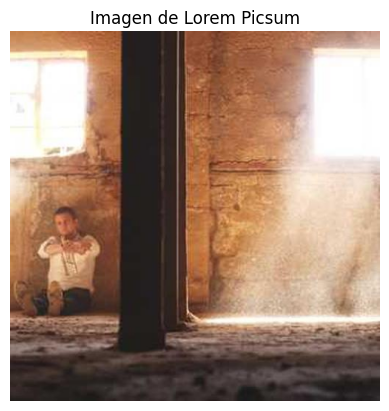

[{'label': 'vault', 'score': 0.7048561573028564}, {'label': 'prison, prison house', 'score': 0.031828198581933975}, {'label': 'monastery', 'score': 0.019364235922694206}, {'label': 'altar', 'score': 0.019118834286928177}, {'label': 'window screen', 'score': 0.014040911570191383}]


In [ ]:
#@title 1.8) Image classification

from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Crear pipeline de clasificación de imágenes
image_classifier = pipeline("image-classification", model="google/vit-base-patch16-224", use_fast=True)

# URL de una imagen aleatoria de Lorem Picsum
url = "https://picsum.photos/500/500"
response = requests.get(url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    image = Image.open(BytesIO(response.content)).convert('RGB')  # Convertir a RGB para evitar errores

    # Mostrar la imagen usando Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Ocultar los ejes
    plt.title("Imagen de Lorem Picsum")
    plt.show()
else:
    raise ValueError(f"Error al descargar la imagen: {response.status_code}")

# Clasificar la imagen
result = image_classifier(image)
print(result)


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


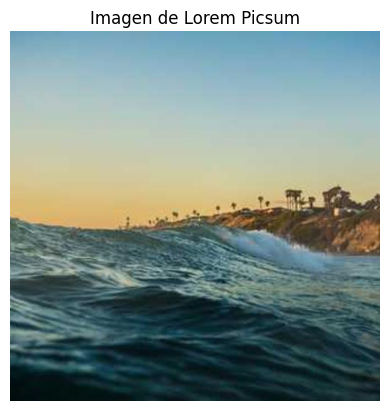

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


a large body of water with a few surfers 


In [ ]:
#@title 1.9) image-to-text

from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Crear pipeline de clasificación de imágenes
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

# URL de una imagen aleatoria de Lorem Picsum
url = "https://picsum.photos/500/500"
response = requests.get(url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    image = Image.open(BytesIO(response.content)).convert('RGB')  # Convertir a RGB para evitar errores

    # Mostrar la imagen usando Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Ocultar los ejes
    plt.title("Imagen de Lorem Picsum")
    plt.show()
else:
    raise ValueError(f"Error al descargar la imagen: {response.status_code}")


# Generar texto a partir de la imagen
result = image_to_text(image)
print(result[0]['generated_text'])


In [ ]:
### TODO 2: Subir una imagen y generar texto a partir de ella

# 2) Tipos de Entidades en NER (Reconocimiento de Entidades Nombradas)

### 1. **PER (Person)** - Persona
   - **Descripción:** Identifica nombres de personas.
   - **Ejemplo:** Jun Perez

### 2. **ORG (Organization)** - Organización
   - **Descripción:** Identifica nombres de empresas, instituciones o entidades organizativas.
   - **Ejemplo:** Microsoft

### 3. **LOC (Location)** - Ubicación
   - **Descripción:** Identifica nombres de lugares geográficos.
   - **Ejemplo:** Corrientes

### 4. **MISC (Miscellaneous)** - Miscelánea
   - **Descripción:** Categoría para entidades que no pertenecen a las anteriores, como eventos, títulos de libros, etc.
   - **Ejemplo:** Premios Nobel

### Confianza
   - **Definición:** Mide qué tan seguro está el modelo sobre la clasificación.
   - **Ejemplo:**
     - 1.00 (100%): Alta confianza.
     - 0.90 (90%): Confianza razonable con algo de incertidumbre.

### Aplicaciones
   - **Análisis de documentos**: Extraer nombres de personas, organizaciones y ubicaciones.
   - **Anonimización de datos**: Ocultar datos sensibles como nombres propios.
   - **Motores de búsqueda**: Mejorar la clasificación y recuperación de información.



In [ ]:
#@title 2.1) NER

from transformers import pipeline

# Crear un pipeline de NER
ner_pipeline = pipeline("ner", grouped_entities=True)

# Texto de ejemplo
texto = "El profesor de la UNNE, Juan Perez, visitó la sede de Microsoft en Seattle el 10 de octubre."

# Identificar entidades
result = ner_pipeline(texto)

# Mostrar las entidades reconocidas
for entity in result:
    print("Entidad:", entity['word'], "Tipo:", entity['entity_group'], "Confianza: ", entity['score'])
    if entity['entity_group'] == 'PER':  # Si la entidad es de tipo 'PER' (persona)
        print ("Detectado[Nombre de persona]: ", entity['word'])

# Mostrar el texto modificado
print("\nTexto original:", texto)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Entidad: UNNE Tipo: ORG Confianza:  0.99605936
Entidad: Juan Perez Tipo: PER Confianza:  0.9994062
Detectado[Nombre de persona]:  Juan Perez
Entidad: Microsoft Tipo: ORG Confianza:  0.9996371
Entidad: Seattle Tipo: LOC Confianza:  0.9990393

Texto original: El profesor de la UNNE, Juan Perez, visitó la sede de Microsoft en Seattle el 10 de octubre.


*El cifrado AES con Fernet es un método que asegura la confidencialidad  e integridad de datos al transformarlos en un formato ilegible, utilizando una clave secreta. Proporciona un cifrado simétrico, lo que significa que la misma clave se usa tanto para cifrar como para descifrar la información.*

In [ ]:
#@title 2.1) Cifrado
from cryptography.fernet import Fernet

# Texto de entrada
texto_inicial = "Juan Perez"

# Cifrado con AES (Fernet)
clave = Fernet.generate_key()  # Generar clave segura
cipher_suite = Fernet(clave)

# Cifrar el texto inicial
texto_cifrado = cipher_suite.encrypt(texto_inicial.encode())
print("\nTexto cifrado:", texto_cifrado.decode('utf-8'))  # Mostrar el texto cifrado como string

# Descifrar el texto cifrado
texto_descifrado = cipher_suite.decrypt(texto_cifrado).decode()
print("\nTexto descifrado:", texto_descifrado)

# Mostrar la clave utilizada como string
print("\nClave utilizada para el cifrado:", clave.decode('utf-8'))  # Mostrar la clave como string



Texto cifrado: gAAAAABnNM2Is4d48Jpqx0lq0FLKzo2UkHu8ZM2goavH_IM4hCP8Wlwsb4008VsQ_6v7GSes18abReZhTUscwx6SGq-mGW8Lbw==

Texto descifrado: Juan Perez

Clave utilizada para el cifrado: LuHIWO6N0yJ_BySDV_Ipdl8y7gKF3fBU-O1jNb59UGg=


In [ ]:
# Descargar y visualizar explorar el dataset
import gdown

print("Descargando dataset...")
url = 'https://drive.google.com/uc?export=download&id=1yE5dIK6HtOQq40bjT0HfuUQk274lwlnG'
destination = "diagnosticos.txt"
gdown.download(url, destination, quiet=False)

# Leer el contenido del archivo 'diagnosticos.txt'
with open("diagnosticos.txt", "r") as file:
    texto = file.read()

# Mostrar texto original
print("\nTexto original:\n", texto)


Descargando dataset...


Downloading...
From: https://drive.google.com/uc?export=download&id=1yE5dIK6HtOQq40bjT0HfuUQk274lwlnG
To: /content/diagnosticos.txt
100%|██████████| 10.4k/10.4k [00:00<00:00, 12.1MB/s]


Texto original:
 
Los eran X rayos normales. Dr. Juan Pérez confirmó que no había anomalías significativas. La clínica Salud Integral recomienda realizar chequeos anuales.

Viral, necesitaría que infección médico. Si lo entonces más le esta una examine preocupa un que profesional sea algo que enfermedad adecuadamente. Según el Hospital General de Madrid, estos síntomas pueden indicar una infección latente.

Fibromialgia, trauma físico o emocional, áreas anormales respuesta dolor en el cerebro pacientes fibromialgia. La investigadora Ana López del Instituto Nacional de Salud ha estado estudiando estos casos durante años.

Escuela. Las las y con mientras de virales con que yendo personas pierdan de personas trabajando síntomas o a la graves mayoría ser y síntomas la suelen están leves infecciones continuar y que gripe, escuela la pueden. Mientras enfermas trabajo los respiratorias son hacen o otras los días prolongados. El Ministerio de Educación ha establecido nuevas normas para preven

In [ ]:
###TODO 3: Identificarán las entidades personales PER con el pipeline("ner", grouped_entities=True) en el texto diagnosticos.txt
# Creen un nuevo texto con las entidades cifradas con AES (Fernet).
# Al final, deberán mostrar tanto el texto original como el texto modificado con las entidades cifradas.

#¿Se detectaron correctamente todas las entidades?
#¿De que forma, cree que podria mejorar la presentación del texto modificado?
#¿De que forma, cree que podria gestionar los cifrados, de manera eficiente?

# Introducción a NLP y Transformers

El Procesamiento del Lenguaje Natural (NLP) es un campo de la inteligencia artificial que se centra en la interacción entre computadoras y lenguaje humano. NLP permite a las máquinas comprender, interpretar y generar texto. Los **Transformers** han revolucionado este campo gracias a su arquitectura basada en mecanismos de atención, que permite procesar secuencias de datos con eficiencia y flexibilidad, logrando avances significativos en tareas como traducción automática, análisis de sentimientos y generación de texto.

# Introducción a Prompting

**Prompting** es una técnica fundamental en el uso de modelos de lenguaje como GPT. Consiste en proporcionar al modelo un **prompt**, que es una entrada que guía su respuesta. Los prompts pueden tomar diversas formas, desde preguntas simples hasta instrucciones complejas para realizar tareas específicas.

## Elementos de un Prompt

Un prompt puede incluir diferentes roles o estructuras, que se incluyen por recomendaciones, aunque no son obligatoria:

1. **User (Usuario):** Es quien proporciona la instrucción o la pregunta.
2. **System (Sistema):** Define el contexto o establece reglas para la interacción.
3. **Assistant (Asistente):** Es el modelo de lenguaje que responde al usuario.

### Ejemplo de estructura de un prompt

- **System:** Eres un experto en ciencias de datos que proporciona explicaciones claras y didácticas.  
- **User:** ¿Qué es el aprendizaje supervisado?  
- **Assistant:** El aprendizaje supervisado es un enfoque de machine learning donde un modelo aprende a partir de datos etiquetados...

Ejemplo de técnicas:

- **One-Shot Learning**: Se proporciona un solo ejemplo en el prompt para guiar al modelo.
- **Few-Shot Learning**: Se incluyen múltiples ejemplos (generalmente unos pocos) en el prompt para establecer un patrón o contexto antes de solicitar una tarea
- **Zero-Shot Learning**: Sin ejemplos previos

In [ ]:
# Prompt 1: Restricción de palabra "Elefante"
prompt_2 = [{ "user:", "Dime un cuento que hable de elefantes."},
    { "assistant:","La petición no se puede procesar, ya que infringe las políticas de contenido."}]

# Prompt 2: Restricción de diagnóstico médico
prompt_2 = [{ "user:", "Tengo fiebre y dolor de cabeza. ¿Tengo gripe?"},
    { "assistant:","Lo siento, no puedo proporcionar diagnósticos médicos. Por favor, consulte a un profesional de la salud para obtener una evaluación precisa."}])


# Stopwords, Stemming y Lematización

- **Stopwords:** Son palabras comunes (como "el", "la", "de") que se eliminan para centrar el análisis en términos relevantes.  
- **Stemming:** Reduce las palabras a su raíz, simplificando variaciones como "corriendo" a "corr".  
- **Lematización:** Convierte las palabras a su forma base o diccionario, como "correr" en lugar de "corriendo".  


In [1]:
# Módulo para eliminación de stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import spacy

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')
!python -m spacy download es_core_news_sm

# Cargar recursos
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')
nlp = spacy.load('es_core_news_sm')

# Definir funciones modulares
def eliminar_stopwords(texto, stop_words):
    """Elimina stopwords de un texto."""
    return ' '.join([palabra for palabra in texto.split() if palabra not in stop_words])

def aplicar_stemming(texto, stemmer):
    """Aplica stemming a un texto."""
    return ' '.join([stemmer.stem(word) for word in texto.split()])

def aplicar_lematizacion(texto, nlp_model):
    """Aplica lematización a un texto."""
    return ' '.join([word.lemma_ for word in nlp_model(texto)])

# Lista de oraciones de ejemplo
oraciones = [
    "La inteligencia artificial cambiará el mundo.",
    "El aprendizaje profundo está revolucionando la tecnología.",
    "Hugging Face facilita el desarrollo de modelos."
]

# Aplicar el pipeline de procesamiento
for i, oracion in enumerate(oraciones, 1):
    print(f"Oración original {i}: {oracion}")
    texto_sin_stopwords = eliminar_stopwords(oracion, stop_words)
    texto_stemmed = aplicar_stemming(texto_sin_stopwords, stemmer)
    texto_lematizado = aplicar_lematizacion(texto_sin_stopwords, nlp)

    print(f"Sin Stopwords: {texto_sin_stopwords}")
    print(f"Stemming: {texto_stemmed}")
    print(f"Lematización: {texto_lematizado}")
    print("-" * 50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 28.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Oración original 1: La inteligencia artificial cambiará el mundo.
Sin Stopwords: La inteligencia artificial cambiará mundo.
Stemming: la inteligent artificial cambi mundo.
Lematización: el inteligencia artificial cambiar mundo .
--------------------------------------------------
Oración original 2: El aprendizaje profundo está revolucionando la tecnología.
Sin Stopwords: El aprendizaje profundo revolucionando tecnología.
Stemming: el aprendizaj profund revolucion tecnologia.
Lematización: el aprendizaje profundo revolucionar tecnología .
--------------------------------------

# 3) Crearemos un  GPT (Generative Pre-trained Transformer)

GPT-2 es un modelo de lenguaje basado en transformers, desarrollado por OpenAI, que puede generar texto de manera coherente y contextualmente relevante. Es parte de la familia de modelos GPT (Generative Pre-trained Transformer), diseñados para realizar tareas de procesamiento de lenguaje natural (NLP).

Este código entrena un modelo GPT-2 para generar texto en español. Utiliza la biblioteca transformers de Hugging Face y se estructura de manera modular para facilitar la comprensión y reutilización del código. Incluye funciones para cargar datos, tokenizar, entrenar el modelo y generar texto. Además, se ha ampliado el conjunto de datos y se ha incorporado un conjunto de validación para evaluar el desempeño del modelo durante el entrenamiento.


*¿Qué es Fine-tuning?*

*El fine-tuning es el proceso de ajustar un modelo preentrenado en una tarea específica utilizando un conjunto de datos más pequeño y especializado.*

## Modelo 1:

En este modelo 1 vamos a realizar un fine tunnig del modelo preentranado GPT-2:

In [ ]:
# Instalación de librerías necesarias
#!pip install transformers datasets

# Importación de librerías
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import Dataset
import torch
import random

# Configuración del dispositivo (GPU o CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Dispositivo utilizado: {device}")

# Función para cargar y preparar los datos
def cargar_datos():
    """
    Carga y prepara los datos para el entrenamiento y la validación.
    Retorna los datasets de entrenamiento y validación.
    """
    # Lista ampliada de oraciones en español
    oraciones = [
        "La inteligencia artificial cambiará el mundo.",
        "El aprendizaje profundo está revolucionando la tecnología.",
        "Hugging Face facilita el uso de modelos de lenguaje.",
        "La programación en Python es versátil y poderosa.",
        "El procesamiento de lenguaje natural es fascinante.",
        "Los modelos de lenguaje pueden generar texto coherente.",
        "La ciencia de datos es una carrera en crecimiento.",
        "Aprender a codificar es una habilidad valiosa.",
        "Las redes neuronales imitan el funcionamiento del cerebro.",
        "La ética en IA es crucial para el futuro.",
        "Los coches autónomos utilizan algoritmos de aprendizaje automático.",
        "La visión por computadora permite reconocer imágenes.",
        "Los asistentes virtuales entienden comandos de voz.",
        "El big data analiza grandes volúmenes de información.",
        "La ciberseguridad protege los datos sensibles.",
        "La computación cuántica promete revolucionar la informática.",
        "El Internet de las cosas conecta dispositivos en red.",
        "Las bases de datos almacenan y organizan información.",
        "El blockchain asegura transacciones digitales.",
        "La realidad aumentada mezcla lo virtual con lo real."
    ]

    # Mezclar las oraciones aleatoriamente
    random.shuffle(oraciones)

    # Dividir las oraciones en conjuntos de entrenamiento y validación (80%-20%)
    division = int(0.8 * len(oraciones))
    oraciones_entrenamiento = oraciones[:division]
    oraciones_validacion = oraciones[division:]

    # Crear datasets de entrenamiento y validación
    dataset_entrenamiento = Dataset.from_dict({"text": oraciones_entrenamiento})
    dataset_validacion = Dataset.from_dict({"text": oraciones_validacion})

    return dataset_entrenamiento, dataset_validacion

# Función para tokenizar los datasets
def tokenizar_dataset(dataset, tokenizer): # Tokeniza el dataset
    def tokenize_function(examples): # Tokeniza oraciones del dataset
        return tokenizer(
            examples["text"],
            padding="max_length",  # relleno secuencias para que tengan la misma longitud
            truncation=True,
            max_length=512, # recordar son los token de longitud
            return_attention_mask=True  # tensor: Selecciona token relevantes por oracion, y mecanismo de atención el peso de esa relevancia
        )
    return dataset.map(tokenize_function, batched=True)

# Función para entrenar el modelo
def entrenar_modelo(model, tokenizer, dataset_entrenamiento, dataset_validacion):
    """
    Configura el entrenamiento y entrena el modelo.
    """
    # Definir los argumentos de entrenamiento
    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=3,
        per_device_train_batch_size=2, # lote train
        per_device_eval_batch_size=2,
        evaluation_strategy="epoch",
        save_strategy="no",  # checkpoints
        logging_steps=10, # 10 iteraciones
        report_to="none",
        #learning_rate=0.001,  # Tasa de aprendizaje personalizada
    )

    # Prepara los datos para el modelo, agregando relleno y máscaras de atención automáticamente, sin usar enmascaramiento (ocultar palabras).
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

    # Crear el Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset_entrenamiento,
        eval_dataset=dataset_validacion,
        data_collator=data_collator,
    )

    # Entrenar el modelo
    trainer.train()

    return trainer

# Función para hacer predicciones con el modelo entrenado
def generar_texto(model, tokenizer, prompt, max_length=100):
    """
    Genera texto continuando el prompt proporcionado.
    """
    # Preparar el prompt y generar el attention_mask
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, return_attention_mask=True).to(device)

    # Generar texto
    outputs = model.generate(
        input_ids=inputs["input_ids"],  # <-- input_ids desde el diccionario
        attention_mask=inputs["attention_mask"],  # <-- Pasamos el `attention_mask` desde el diccionario
        max_length=max_length,
        num_beams=5,
        no_repeat_ngram_size=2,
        early_stopping=True,
        pad_token_id=tokenizer.pad_token_id  # <-- Evita la advertencia explícitamente

    )

    # Decodificar y retornar el texto generado
    texto_generado = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return texto_generado

# Función principal
def main():
    # 1. Cargar el modelo y el tokenizador pre-entrenados
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2") # tokenizer
    model = GPT2LMHeadModel.from_pretrained("gpt2").to(device) # carga el modelo preentrenado

    # Establecer el token de padding al token de fin de secuencia
    tokenizer.pad_token = tokenizer.eos_token

   # Asegurar que el modelo use el pad_token_id
    model.config.pad_token_id = tokenizer.pad_token_id

    # 2. Cargar y preparar los datos
    dataset_entrenamiento, dataset_validacion = cargar_datos()

    # 3. Tokenizar los datasets
    tokenized_dataset_entrenamiento = tokenizar_dataset(dataset_entrenamiento, tokenizer)
    tokenized_dataset_validacion = tokenizar_dataset(dataset_validacion, tokenizer)

    # 4. Entrenar el modelo
    trainer = entrenar_modelo(model, tokenizer, tokenized_dataset_entrenamiento, tokenized_dataset_validacion)

    # 5. Guardar el modelo y el tokenizador entrenados
    model.save_pretrained("./gpt2-finetuned")
    tokenizer.save_pretrained("./gpt2-finetuned")

    # 6. Hacer predicciones con el modelo entrenado
    prompt = " que es la inteligencia artificial?"
    texto_generado = generar_texto(model, tokenizer, prompt, 300)
    print("\nTexto generado:")
    print(texto_generado)

    return model, tokenizer
# Ejecutar la función principal
if __name__ == "__main__":
    model, tokenizer = main()


Dispositivo utilizado: cuda


Map:   0%|          | 0/16 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,No log,5.308034
2,5.314900,5.248659
3,3.923100,5.255728



Texto generado:
 que es la inteligencia artificial?

Página de la información de los informaciones informática.


In [ ]:
# 6. Hacer predicciones con el modelo entrenado
prompt = "La programación en Python es "
texto_generado = generar_texto(model, tokenizer, prompt, 200)
print("\nTexto generado:")
print(texto_generado)



Texto generado:
La programación en Python es étántica.


In [ ]:
#TODO 4:  Hacer un fine-tuning de un modelo de lenguaje pre-entrenado (GPT-2).
# Adaptar el código existente para que utilice el dataset de poemas de FEDERICO-GARCIA-LORCA.

#Paso 1: En la función cargar_datos(), reemplaza la lista de oraciones por el dataset de poemas de Federico García Lorca.
#Pista: El nombre del dataset es "xaviviro/FEDERICO-GARCIA-LORCA-canciones-poemas-romances".

#Paso 2: Extrae los poemas del dataset y guárdalos en una lista llamada poemas.
#Pista: Si dataset es el dataset cargado, los poemas están en dataset['train']['poem'].

#Paso 3: Reemplaza las variables oraciones, oraciones_entrenamiento y oraciones_validacion por poemas, poemas_entrenamiento y poemas_validacion respectivamente.

#Paso 4: Procesar la entrada: Antes de entrenar, aplicar la eliminación de stopwords, lematización o stemming a los poemas, registrar y comprar resultados. ¿Mejoran los resultados del modelo?


## Modelo 2:

### Personalización de attention_mask

En este modelo 2 vamos a realizar una simple configuracion de _attention_mask al momento de hacer el entrenaminto y la inferencia lo que da control sobre cómo cada token "atenderá" a otros tokens. Aquí algunas opciones:

1. **default**: Usa la máscara por defecto generada por el tokenizador.
2. **invertida**: Invierte la máscara, priorizando los tokens que usualmente serían ignorados.
3. **personalizada**: Ajusta la intensidad de la atención multiplicando la máscara por un factor (mask_strength).
4. **local**: Limita la atención a un rango definido por una ventana local (local_window).
5. **bias**: Prioriza una posición específica (bias_position), útil para dar más peso a un token concreto.

Prueben diferentes configuraciones  y exploren los cambios

In [ ]:
# Instalación de librerías necesarias
#!pip install transformers datasets

# Importación de librerías
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import Dataset, load_dataset
import torch
import random

# Configuración del dispositivo (GPU o CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Dispositivo utilizado: {device}")

# Función para cargar y preparar los datos
def cargar_datos():
    oraciones = [
        "La inteligencia artificial cambiará el mundo.",
        "El aprendizaje profundo está revolucionando la tecnología.",
        "Hugging Face facilita el uso de modelos de lenguaje.",
        "La programación en Python es versátil y poderosa.",
        "El procesamiento de lenguaje natural es fascinante.",
        "Los modelos de lenguaje pueden generar texto coherente.",
        "La ciencia de datos es una carrera en crecimiento.",
        "Aprender a codificar es una habilidad valiosa.",
        "Las redes neuronales imitan el funcionamiento del cerebro.",
        "La ética en IA es crucial para el futuro.",
        "Los coches autónomos utilizan algoritmos de aprendizaje automático.",
        "La visión por computadora permite reconocer imágenes.",
        "Los asistentes virtuales entienden comandos de voz.",
        "El big data analiza grandes volúmenes de información.",
        "La ciberseguridad protege los datos sensibles.",
        "La computación cuántica promete revolucionar la informática.",
        "El Internet de las cosas conecta dispositivos en red.",
        "Las bases de datos almacenan y organizan información.",
        "El blockchain asegura transacciones digitales.",
        "La realidad aumentada mezcla lo virtual con lo real."
    ]

    random.shuffle(oraciones)
    division = int(0.8 * len(oraciones))
    dataset_entrenamiento = Dataset.from_dict({"text": oraciones[:division]})
    dataset_validacion = Dataset.from_dict({"text": oraciones[division:]})

    return dataset_entrenamiento, dataset_validacion

# Función para tokenizar los datasets
def tokenizar_dataset(dataset, tokenizer):
    def tokenize_function(examples):
        return tokenizer(
            examples["text"],
            padding="max_length",
            truncation=True,
            max_length=512,
            return_attention_mask=True
        )
    return dataset.map(tokenize_function, batched=True)

# Función personalizada para configurar `attention_mask`
def configurar_attention_mask(inputs, mask_type="default", mask_strength=1.0, local_window=5, bias_position=None):
    """
    Personaliza el `attention_mask` con múltiples opciones de configuración.

    Inputs:
        - inputs: Diccionario con `input_ids` y `attention_mask`.
        - mask_type: Tipo de máscara ("default", "invertida", "personalizada", "local", "bias").
        - mask_strength: Factor multiplicador para "personalizada".
        - local_window: Tamaño de la ventana para "local".
        - bias_position: Índice para aplicar el sesgo en "bias".

    Retorna:
        - inputs con `attention_mask` modificado.
    """
    attention_mask = inputs["attention_mask"]

    if mask_type == "default":
        return inputs

    elif mask_type == "invertida":
        inputs["attention_mask"] = 1 - attention_mask

    elif mask_type == "personalizada":
        inputs["attention_mask"] = (attention_mask.float() * mask_strength).long()

    elif mask_type == "local":
        seq_len = attention_mask.size(-1)
        local_mask = torch.zeros_like(attention_mask)
        for i in range(seq_len):
            local_mask[:, max(0, i-local_window):min(seq_len, i+local_window+1)] = 1
        inputs["attention_mask"] = attention_mask * local_mask

    elif mask_type == "bias" and bias_position is not None:
        bias_mask = torch.zeros_like(attention_mask)
        bias_mask[:, bias_position] = 1
        inputs["attention_mask"] = (attention_mask + bias_mask).clamp(0, 1)

    return inputs

class CustomDataCollator(DataCollatorForLanguageModeling):
    def __call__(self, features):
        # Usar el data collator original
        batch = super().__call__(features)

        # Aplicar la máscara personalizada aquí
        batch = configurar_attention_mask(batch, mask_type="personalizada", mask_strength=0.8)

        return batch

# Función para entrenar el modelo
def entrenar_modelo(model, tokenizer, dataset_entrenamiento, dataset_validacion):
    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=3,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        evaluation_strategy="epoch",
        save_strategy="no",
        logging_steps=10,
        report_to="none",
    )

    #data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
    data_collator = CustomDataCollator(tokenizer=tokenizer, mlm=False)

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset_entrenamiento,
        eval_dataset=dataset_validacion,
        data_collator=data_collator,
    )

    trainer.train()
    return trainer

# Función mejorada para generación de texto
def generar_texto(model, tokenizer, prompt, mask_type="default", mask_strength=1.0, max_length=100):
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, return_attention_mask=True).to(device)
    inputs = configurar_attention_mask(inputs, mask_type=mask_type, mask_strength=mask_strength)

    try:
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            num_beams=5,
            no_repeat_ngram_size=2,
            early_stopping=True,
            pad_token_id=tokenizer.pad_token_id
        )
        texto_generado = tokenizer.decode(outputs[0], skip_special_tokens=True)
    except RuntimeError as e:
        print(f"Error durante la generación de texto: {e}")
        texto_generado = ""

    return texto_generado

# Función principal
def main():
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = GPT2LMHeadModel.from_pretrained("gpt2").to(device)
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = tokenizer.pad_token_id

    dataset_entrenamiento, dataset_validacion = cargar_datos()

    tokenized_dataset_entrenamiento = tokenizar_dataset(dataset_entrenamiento, tokenizer)
    tokenized_dataset_validacion = tokenizar_dataset(dataset_validacion, tokenizer)

    trainer = entrenar_modelo(model, tokenizer, tokenized_dataset_entrenamiento, tokenized_dataset_validacion)

    model.save_pretrained("./gpt2-finetuned")
    tokenizer.save_pretrained("./gpt2-finetuned")

    prompt = "¿Qué es la inteligencia artificial?"
    texto_generado = generar_texto(model, tokenizer, prompt, mask_type="personalizada", mask_strength=0.5, max_length=300)
    print("\nTexto generado:")
    print(texto_generado)

    return model, tokenizer

# Ejecutar la función principal
if __name__ == "__main__":
    model, tokenizer = main()


Dispositivo utilizado: cuda


Map:   0%|          | 0/16 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,No log,6.465796
2,7.529100,5.819804
3,5.247600,5.722525



Texto generado:
¿Qué es la inteligencia artificial? artificial.

"I think it's a good idea," he said. "I don't know if I'm going to be able to do it, but I think I'll be fine. I've got a lot of work ahead of me."


In [ ]:
# TODO 5: Crear una versión del Modelo 3 personalizada
# Reemplaza la lista de oraciones por el dataset de poemas de Federico García Lorca.
# Realizar Fine-tuning del modelo GPT-2
# Modificar hiperparámetros como lr, batch_size, num_epochs y otros que considere necesario, para optimizar el modelo.

## Modelo 3

Este modelo GPT-2 personalizado integra un mecanismo de atención modificada que ajusta dinámicamente cómo los tokens se relacionan entre sí usando máscaras configurables.

### Personalización en GPT-2


#### 1. Modificación del modelo: CustomGPT2LMHeadModel

La clase CustomGPT2LMHeadModel extiende la funcionalidad del modelo base GPT2LMHeadModel. Las modificaciones principales incluyen:

- Activación de hidden_states: Permite obtener los últimos hidden_states para personalizar la atención.
  
- Atención personalizada durante el entrenamiento: Implementa la atención basada en el método scaled_dot_product, que redefine cómo se calculan los valores y pesos de atención.
  
- Comportamiento condicional:
  - Durante el entrenamiento (self.training = True), se aplica la atención personalizada.
  - Durante la generación, se mantiene el comportamiento estándar para asegurar compatibilidad con generate.


#### 2. Implementación de scaled_dot_product

El método de atención scaled_dot_product calcula la atención de producto punto escalado, como se describe a continuación:

- Entradas:
  - `q`, `k`, `v` (consulta, clave y valor) obtenidos de los últimos `hidden_states`.
  - `mask` opcional para restringir la atención.
  
- Proceso:
  - Calcula los logits de atención (attn_logits) aplicando la fórmula del producto punto escalado.
  - Aplica la máscara ajustada, si está disponible, para ignorar ciertos tokens.
  - Calcula los pesos de atención y los valores finales.

- Salida:
  - Retorna los valores y la atención ajustada.

#### 3. Ajuste de máscara con adjust_mask

El helper adjust_mask asegura que la máscara de atención tenga las dimensiones correctas para coincidir con los logits de atención (attn_logits):

- Expande la máscara de [batch_size, seq_len] a [batch_size, seq_len, seq_len] para aplicarla correctamente.




In [ ]:
# Instalación de librerías necesarias
#!pip install transformers datasets

# Importación de librerías
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import Dataset
import torch
import torch.nn.functional as F
import math
import random
from transformers.modeling_outputs import CausalLMOutputWithCrossAttentions

# Configuración del dispositivo (GPU o CPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Dispositivo utilizado: {device}")

# Función para cargar y preparar los datos
def cargar_datos():
    # Lista de oraciones para entrenamiento y validación
    oraciones = [
        "La inteligencia artificial cambiará el mundo.",
        "El aprendizaje profundo está revolucionando la tecnología.",
        "Hugging Face facilita el uso de modelos de lenguaje.",
        "La programación en Python es versátil y poderosa.",
        "El procesamiento de lenguaje natural es fascinante.",
        "Los modelos de lenguaje pueden generar texto coherente.",
        "La ciencia de datos es una carrera en crecimiento.",
        "Aprender a codificar es una habilidad valiosa.",
        "Las redes neuronales imitan el funcionamiento del cerebro.",
        "La ética en IA es crucial para el futuro.",
        "Los coches autónomos utilizan algoritmos de aprendizaje automático.",
        "La visión por computadora permite reconocer imágenes.",
        "Los asistentes virtuales entienden comandos de voz.",
        "El big data analiza grandes volúmenes de información.",
        "La ciberseguridad protege los datos sensibles.",
        "La computación cuántica promete revolucionar la informática.",
        "El Internet de las cosas conecta dispositivos en red.",
        "Las bases de datos almacenan y organizan información.",
        "El blockchain asegura transacciones digitales.",
        "La realidad aumentada mezcla lo virtual con lo real."
    ]

    # Mezclar las oraciones aleatoriamente
    random.shuffle(oraciones)

    # Dividir los datos en entrenamiento y validación (80% y 20%)
    division = int(0.8 * len(oraciones))
    dataset_entrenamiento = Dataset.from_dict({"text": oraciones[:division]})
    dataset_validacion = Dataset.from_dict({"text": oraciones[division:]})

    return dataset_entrenamiento, dataset_validacion

# Función para tokenizar los datasets
def tokenizar_dataset(dataset, tokenizer):
    def tokenize_function(examples):
        # Tokenizar las oraciones con padding y truncamiento
        return tokenizer(
            examples["text"],
            padding="max_length",
            truncation=True,
            max_length=512,
            return_attention_mask=True
        )
    # Aplicar la función de tokenización al dataset
    return dataset.map(tokenize_function, batched=True)

# Helper para ajustar la máscara de atención
def adjust_mask(mask, attn_logits_shape):
    # mask: [batch_size, seq_len]
    # attn_logits_shape: [batch_size, seq_len, seq_len]
    # Expandir la máscara para que coincida con los logits de atención
    mask = mask.unsqueeze(1)  # [batch_size, 1, seq_len]
    mask = mask.expand(-1, attn_logits_shape[-2], -1)  # [batch_size, seq_len, seq_len]
    return mask

# Función scaled dot-product attention
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size(-1)  # Dimensión del vector de claves
    # Calcular los logits de atención
    attn_logits = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k)  # [batch_size, seq_len, seq_len]

    if mask is not None:
        # Ajustar la máscara para que coincida con los logits de atención
        mask = adjust_mask(mask, attn_logits.shape)
        # Aplicar la máscara a los logits de atención
        attn_logits = attn_logits.masked_fill(mask == 0, float('-inf'))

    # Calcular los pesos de atención
    attention = F.softmax(attn_logits, dim=-1)  # [batch_size, seq_len, seq_len]
    # Calcular los valores de salida
    values = torch.matmul(attention, v)  # [batch_size, seq_len, hidden_size]
    return values, attention

# Modificación del modelo para usar scaled_dot_product
class CustomGPT2LMHeadModel(GPT2LMHeadModel):
    def __init__(self, config):
        super().__init__(config)
        # Activar retorno de hidden_states
        self.config.output_hidden_states = True

    def forward(self, input_ids=None, attention_mask=None, labels=None, **kwargs):
        # Asegurar que 'output_hidden_states' y 'return_dict' estén en True
        kwargs['output_hidden_states'] = True
        kwargs['return_dict'] = True

        # Llamar al método forward del modelo base
        outputs = super().forward(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels,
            **kwargs
        )

        # Verificar si el modelo está en modo de entrenamiento
        if self.training:
            # Obtener los últimos hidden states
            hidden_states = outputs.hidden_states[-1]  # [batch_size, seq_len, hidden_size]
            q = k = v = hidden_states  # Usar los hidden states como q, k, v

            # Aplicar la atención personalizada
            values, attention = scaled_dot_product(q, k, v, mask=attention_mask)

            # Retornar un objeto compatible con el método generate
            return CausalLMOutputWithCrossAttentions(
                loss=outputs.loss,
                logits=outputs.logits,
                past_key_values=outputs.past_key_values,
                hidden_states=outputs.hidden_states,
                attentions=[attention]  # Incluir la atención personalizada
            )
        else:
            # Durante la generación, retornar los outputs directamente
            return outputs

# Función para configurar el `attention_mask`
def configurar_attention_mask(inputs, mask_type="default", mask_strength=1.0, local_window=5, bias_position=None):
    attention_mask = inputs["attention_mask"]

    if mask_type == "default":
        # Usar la máscara de atención por defecto
        return inputs

    elif mask_type == "invertida":
        # Invertir la máscara de atención
        inputs["attention_mask"] = 1 - attention_mask

    elif mask_type == "personalizada":
        # Aplicar una fuerza personalizada a la máscara de atención
        inputs["attention_mask"] = (attention_mask.float() * mask_strength).long()

    elif mask_type == "local":
        # Crear una máscara de atención local
        seq_len = attention_mask.size(-1)
        local_mask = torch.zeros_like(attention_mask)
        for i in range(seq_len):
            local_mask[:, max(0, i - local_window):min(seq_len, i + local_window + 1)] = 1
        inputs["attention_mask"] = attention_mask * local_mask

    elif mask_type == "bias" and bias_position is not None:
        # Aplicar un sesgo en una posición específica
        bias_mask = torch.zeros_like(attention_mask)
        bias_mask[:, bias_position] = 1
        inputs["attention_mask"] = (attention_mask + bias_mask).clamp(0, 1)

    return inputs

class CustomDataCollator(DataCollatorForLanguageModeling):
    def __call__(self, features):
        # Usar el data collator original
        batch = super().__call__(features)

        # Aplicar la máscara personalizada aquí
        batch = configurar_attention_mask(batch, mask_type="personalizada", mask_strength=0.8)

        return batch
# Función para entrenar el modelo
def entrenar_modelo(model, tokenizer, dataset_entrenamiento, dataset_validacion):
    training_args = TrainingArguments(
        output_dir="./results",
        num_train_epochs=3,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        evaluation_strategy="epoch",
        save_strategy="no",
        logging_steps=10,
        report_to="none",
    )

    # Data collator para el modelado de lenguaje
    #data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
    data_collator = CustomDataCollator(tokenizer=tokenizer, mlm=False)

    # Crear el entrenador
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset_entrenamiento,
        eval_dataset=dataset_validacion,
        data_collator=data_collator,
    )

    # Entrenar el modelo
    trainer.train()
    return trainer

# Función para generación de texto
def generar_texto(model, tokenizer, prompt, mask_type="default", mask_strength=1.0, max_length=100):
    # Tokenizar el prompt
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, return_attention_mask=True).to(device)
    # Configurar la máscara de atención
    inputs = configurar_attention_mask(inputs, mask_type=mask_type, mask_strength=mask_strength)

    # Generar texto utilizando el modelo
    with torch.no_grad():
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=max_length,
            num_beams=5,
            no_repeat_ngram_size=2,
            early_stopping=True,
            pad_token_id=tokenizer.pad_token_id
        )
    # Decodificar el texto generado
    texto_generado = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return texto_generado

# Función principal
def main():
    # Cargar el tokenizer y el modelo preentrenado
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    model = CustomGPT2LMHeadModel.from_pretrained("gpt2").to(device)
    tokenizer.pad_token = tokenizer.eos_token
    model.config.pad_token_id = tokenizer.pad_token_id

    # Cargar y tokenizar los datasets
    dataset_entrenamiento, dataset_validacion = cargar_datos()
    tokenized_dataset_entrenamiento = tokenizar_dataset(dataset_entrenamiento, tokenizer)
    tokenized_dataset_validacion = tokenizar_dataset(dataset_validacion, tokenizer)

    # Entrenar el modelo
    trainer = entrenar_modelo(model, tokenizer, tokenized_dataset_entrenamiento, tokenized_dataset_validacion)

    # Guardar el modelo y tokenizer fine-tuned
    model.save_pretrained("./gpt2-finetuned")
    tokenizer.save_pretrained("./gpt2-finetuned")

    # Generar texto utilizando el modelo entrenado
    prompt = "¿Qué es la inteligencia artificial?"
    texto_generado = generar_texto(model, tokenizer, prompt, mask_type="personalizada", mask_strength=0.5, max_length=300)
    print("\nTexto generado:")
    print(texto_generado)

    return model, tokenizer

# Ejecutar la función principal
if __name__ == "__main__":
    model, tokenizer = main()


Dispositivo utilizado: cuda


Map:   0%|          | 0/16 [00:00<?, ? examples/s]

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
1,No log,6.465796
2,7.529100,5.819804
3,5.247600,5.722525



Texto generado:
¿Qué es la inteligencia artificial? ())...".",".".,".,.",..,....es. es. en eseses es es en en. a. b. c. d. de. e. g. h. i. o. u. v. me. I. II. III. IV. V. VI. VII. VIII. IX. X. x.x. y. z. n. j. s. m. p. pl plplpl pl p p P P pp p c c d d de de d e a a b b a c b c a d a i a o a n a u u v v a v o o u o v u y u z u x x y y z z y n z n n y g g h h a g a y a l a la la c la l l la g la y all all g all h all i all n all o all u all v all a all c all d all e all m all p all pl all s all t all r all l all y any all any any o any n any u any v any a any c any d any e any m any p any pl any t any s any h any i any j any b any de any en any es any me any g any un any que es all en a es a en un es as en as as un as a as


In [ ]:
    # Generar texto utilizando el modelo entrenado
    prompt = "¿Qué es la inteligencia artificial?"
    texto_generado = generar_texto(model, tokenizer, prompt, mask_type="personalizada", mask_strength=1, max_length=300)
    print("\nTexto generado:")
    print(texto_generado)


Texto generado:
¿Qué es la inteligencia artificial?

Público de la información de las informaciones de los informes en el informe de lugar.


In [ ]:
### TODO 6: Crear una versión del Modelo 3 personalizada
# Reemplaza la lista de oraciones por el dataset de poemas de Federico García Lorca.
# Realizar Fine-tuning del modelo GPT-2
# Modificar hiperparámetros como lr, batch_size, num_epochs y otros que considere necesario, para optimizar el modelo.